## Run MD with vanilla/og system and then check that difference in energies between vanilla vs hybrid system are close to 0

In [2]:
from tqdm import tqdm_notebook
import openmmtools
import matplotlib.pyplot as plt
import pickle

from simtk import openmm
from simtk.openmm import unit
import openmmtools
from openmmtools.states import SamplerState, ThermodynamicState, CompoundThermodynamicState
from openmmtools import cache
from openmmtools.constants import kB

from perses.annihilation.lambda_protocol import RESTState, RESTCapableRelativeAlchemicalState, RESTCapableLambdaProtocol
from perses.dispersed import feptasks

import numpy as np

from perses.app.relative_point_mutation_setup import PointMutationExecutor


INFO:rdkit:Enabling RDKit 2021.03.4 jupyter extensions


## Generate htf

In [ ]:
solvent_delivery = PointMutationExecutor("../../input/1brs_barstar_renumbered.pdb",
                        '1',
                        '42',
                        'ALA',
                        ligand_input="../../input/1brs_barnase_renumbered.pdb",
                        forcefield_files=['amber14/protein.ff14SB.xml', 'amber14/tip3p.xml'],
                        ionic_strength=0.05*unit.molar,
                        rest_radius=0.2,
                        generate_unmodified_hybrid_topology_factory=False,
                        generate_rest_capable_hybrid_topology_factory=True,
                        conduct_endstate_validation=False,
                       )

DEBUG:openmmforcefields.system_generators:Trying GAFFTemplateGenerator to load gaff-2.11
INFO:setup:solvating at 0.05 M using tip3p
INFO:setup:solvating at 0.05 M using tip3p
INFO:proposal_generator:	Conducting polymer point mutation proposal...
INFO:proposal_generator:local_atom_map: {669: 669, 670: 670, 671: 671, 672: 672, 673: 673, 674: 676, 675: 677}
INFO:proposal_generator:the mapped atom names are: [('N', 'N'), ('CA', 'CA'), ('C', 'C'), ('O', 'O'), ('CB', 'CB'), ('H', 'H'), ('HA', 'HA')]
INFO:setup:Changed particle 201's epsilon from 0.0 kJ/mol to 0.0001 kJ/mol
INFO:setup:Changed particle 201's sigma from 1.0 nm to 0.1 nm
INFO:setup:Changed particle 231's epsilon from 0.0 kJ/mol to 0.0001 kJ/mol
INFO:setup:Changed particle 231's sigma from 1.0 nm to 0.1 nm
INFO:setup:Changed particle 307's epsilon from 0.0 kJ/mol to 0.0001 kJ/mol
INFO:setup:Changed particle 307's sigma from 1.0 nm to 0.1 nm
INFO:setup:Changed particle 486's epsilon from 0.0 kJ/mol to 0.0001 kJ/mol
INFO:setup:Chan

conducting subsequent work with the following platform: CUDA


INFO:geometry:setting atoms_with_positions context new positions


conducting subsequent work with the following platform: CUDA


INFO:geometry:There are 3 new atoms
INFO:geometry:	reduced angle potential = 0.046165521877793034.
INFO:geometry:	reduced angle potential = 0.14667522352959209.
INFO:geometry:	reduced angle potential = 2.2811643557986843.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce', 'MonteCarloBarostat']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 733 bond forces in the no-nonbonded final system
INFO:geometry:	there are 2628 angle forces in the no-nonbonded final system
INFO:geometry:	there are 4943 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with 0 neglected angles.


conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced potential before atom placement: 2667.606655043375


conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA
added energy components: [('CustomBondForce', 0.0), ('CustomAngleForce', 3.1856694559433336), ('CustomTorsionForce', 0.029467372393299395), ('CustomBondForce', 8.79561262175644)]


INFO:geometry:total reduced energy added from growth system: 12.010749450093073
INFO:geometry:final reduced energy 2679.6174042587327
INFO:geometry:sum of energies: 2679.6174044934683
INFO:geometry:magnitude of difference in the energies: 2.3473560872844246e-07
INFO:geometry:Final logp_proposal: 19.960143630679326
INFO:geometry:logp_reverse: performing reverse proposal
INFO:geometry:logp_reverse: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [675, 674, 681, 682, 680, 678, 679]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is reverse; creating atoms_with_positions from old system/topology
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 735 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

conducting subsequent work with the following platform: CUDA


INFO:geometry:setting atoms_with_positions context old positions


conducting subsequent work with the following platform: CUDA


INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.15088552138282585.
INFO:geometry:	reduced angle potential = 1.1717867235443227.
INFO:geometry:	reduced angle potential = 2.0226598106735676e-06.
INFO:geometry:	reduced angle potential = 8.429836390053187e-06.
INFO:geometry:	reduced angle potential = 6.103681872621702e-06.
INFO:geometry:	reduced angle potential = 0.0014485627329499679.
INFO:geometry:	reduced angle potential = 0.0037318575268475676.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce', 'MonteCarloBarostat']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 735 bond forces in the no-nonbonded final system
INFO:geometry:	there are 2635 angle forces in the no-nonbonde

conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced potential before atom placement: 2667.6066550433757


conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA
added energy components: [('CustomBondForce', 0.33407521838716286), ('CustomAngleForce', 1.7019045529067363), ('CustomTorsionForce', 10.252126980649416), ('CustomBondForce', -73.24630632041867)]


INFO:geometry:total reduced energy added from growth system: -60.958199568475365
INFO:geometry:final reduced energy 2606.648455666519
INFO:geometry:sum of energies: 2606.6484554749004
INFO:geometry:magnitude of difference in the energies: 1.9161880970841594e-07
INFO:geometry:Final logp_proposal: -7252.10338555722
INFO:setup:charge diff: 0
INFO:relative:*** Generating RESTCapableHybridTopologyFactory ***
INFO:relative:Old system forces: dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce', 'MonteCarloBarostat'])
INFO:relative:New system forces: dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce', 'MonteCarloBarostat'])
INFO:relative:No unknown forces.
INFO:relative:r_cutoff is 1.0 nm
INFO:relative:alpha_ewald is 2.7569734238004693
INFO:relative:w_scale is 0.1
INFO:relative:Creating hybrid system
INFO:relative:Adding and mapping old atoms to hybrid system...
INFO:relative:Adding and mapping new atoms to 

In [ ]:
pickle.dump(solvent_delivery.get_complex_htf(), open("bnbs_complex.pickle", "wb" ))
pickle.dump(solvent_delivery.get_apo_htf(), open("bnbs_apo.pickle", "wb" ))


## Test at lambda = 1

In [3]:
# htf = solvent_delivery.get_apo_htf()
with open("bnbs_apo.pickle", "rb") as f:
    htf = pickle.load(f)
hybrid_system = htf.hybrid_system
hybrid_positions = htf.hybrid_positions
box_vectors = hybrid_system.getDefaultPeriodicBoxVectors()


In [4]:
htf.hybrid_topology.n_atoms

16047

In [3]:
htf.hybrid_system.getForces()

[<openmm.openmm.MonteCarloBarostat; proxy of <Swig Object of type 'OpenMM::MonteCarloBarostat *' at 0x2b7373e77a80> >,
 <openmm.openmm.CustomBondForce; proxy of <Swig Object of type 'OpenMM::CustomBondForce *' at 0x2b7373e77d50> >,
 <openmm.openmm.CustomAngleForce; proxy of <Swig Object of type 'OpenMM::CustomAngleForce *' at 0x2b7373e77d80> >,
 <openmm.openmm.CustomTorsionForce; proxy of <Swig Object of type 'OpenMM::CustomTorsionForce *' at 0x2b7373e77630> >,
 <openmm.openmm.CustomNonbondedForce; proxy of <Swig Object of type 'OpenMM::CustomNonbondedForce *' at 0x2b7373e77e10> >,
 <openmm.openmm.CustomNonbondedForce; proxy of <Swig Object of type 'OpenMM::CustomNonbondedForce *' at 0x2b73fabb30f0> >,
 <openmm.openmm.CustomBondForce; proxy of <Swig Object of type 'OpenMM::CustomBondForce *' at 0x2b73fabb3180> >,
 <openmm.openmm.NonbondedForce; proxy of <Swig Object of type 'OpenMM::NonbondedForce *' at 0x2b73fabb3210> >]

In [4]:
T_min = 300 * unit.kelvin
T_max = 600 * unit.kelvin

# Create thermodynamic state
lambda_protocol = RESTCapableLambdaProtocol()
lambda_zero_alchemical_state = RESTCapableRelativeAlchemicalState.from_system(hybrid_system)
thermostate = ThermodynamicState(hybrid_system, temperature=T_min)
compound_thermodynamic_state = CompoundThermodynamicState(thermostate,
                                                          composable_states=[lambda_zero_alchemical_state])

# Set alchemical parameters
beta_0 = 1 / (kB * T_min)
beta_m = 1 / (kB * T_max)
global_lambda = 1
compound_thermodynamic_state.set_alchemical_parameters(global_lambda, beta_0, beta_m, lambda_protocol=lambda_protocol)

print(compound_thermodynamic_state.lambda_rest_bonds)
print(compound_thermodynamic_state.lambda_alchemical_bonds_old)
print(compound_thermodynamic_state.lambda_alchemical_bonds_new)


1.0
0.0
1.0


In [5]:
integrator = openmmtools.integrators.LangevinIntegrator(temperature=300 * unit.kelvin, 
                                    collision_rate=1 / unit.picoseconds, 
                                    timestep=4 * unit.femtoseconds)
context = compound_thermodynamic_state.create_context(integrator)
context.setPositions(hybrid_positions)
context.setPeriodicBoxVectors(*box_vectors)
context.setVelocitiesToTemperature(300 * unit.kelvin)


In [6]:
for k, v in context.getParameters().items():
    print(k, v)

MonteCarloPressure 1.01325
MonteCarloTemperature 300.0
lambda_alchemical_angles_new 1.0
lambda_alchemical_angles_old 0.0
lambda_alchemical_bonds_new 1.0
lambda_alchemical_bonds_old 0.0
lambda_alchemical_electrostatics_exceptions_new 1.0
lambda_alchemical_electrostatics_exceptions_old 0.0
lambda_alchemical_electrostatics_new 1.0
lambda_alchemical_electrostatics_old 0.0
lambda_alchemical_electrostatics_reciprocal 1.0
lambda_alchemical_sterics_exceptions_new 1.0
lambda_alchemical_sterics_exceptions_old 0.0
lambda_alchemical_sterics_new 1.0
lambda_alchemical_sterics_old 0.0
lambda_alchemical_torsions_new 1.0
lambda_alchemical_torsions_old 0.0
lambda_rest_angles 1.0
lambda_rest_bonds 1.0
lambda_rest_electrostatics 1.0
lambda_rest_electrostatics_exceptions 1.0
lambda_rest_sterics 1.0
lambda_rest_sterics_exceptions 1.0
lambda_rest_torsions 1.0


In [7]:
# Minimize
openmm.LocalEnergyMinimizer.minimize(context)


In [8]:
# Run MD
# hybrid = list()
hybrid_states = list()
for _ in tqdm_notebook(range(int(125000/250))):
    integrator.step(250)
    state = context.getState(getPositions=True, enforcePeriodicBox=False)
    hybrid_states.append(state)
#     pos = context.getState(getPositions=True, enforcePeriodicBox=False).getPositions(asNumpy=True)
#     hybrid.append(pos)


/scratch/lsftmp/4137575.tmpdir/ipykernel_46084/1273711913.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm_notebook(range(int(125000/250))):


  0%|          | 0/500 [00:00<?, ?it/s]

In [9]:
# with open("hybrid_positions_bnbs_lambda_1.pickle", "wb") as f:
#     pickle.dump(hybrid, f)
with open("hybrid_states_bnbs_lambda_1.pickle", "wb") as f:
    pickle.dump(hybrid_states, f)

In [4]:
# with open("hybrid_positions_bnbs_lambda_1.pickle", "rb") as f:
#     hybrid = pickle.load(f)
with open("hybrid_states_bnbs_lambda_1.pickle", "rb") as f:
    hybrid_states = pickle.load(f)

In [10]:
T_min = 300 * unit.kelvin
T_max = 600 * unit.kelvin

# Make context for og system
thermodynamic_state = ThermodynamicState(htf._topology_proposal.new_system, temperature=T_min)
integrator_og = openmmtools.integrators.LangevinIntegrator(temperature=300 * unit.kelvin,
                                          collision_rate=1 / unit.picoseconds,
                                          timestep= 4 * unit.femtoseconds)
context_og = thermodynamic_state.create_context(integrator_og)
# context_og.setPeriodicBoxVectors(*box_vectors)

# Zero the unique old/new valence in the hybrid system
bond_force_index = 1 
angle_force_index = 2 
torsion_force_index = 3 
custom_bond_force = hybrid_system.getForce(bond_force_index)
custom_angle_force = hybrid_system.getForce(angle_force_index)
custom_torsion_force = hybrid_system.getForce(torsion_force_index)
is_old = False
hybrid_to_bond_indices = htf._hybrid_to_new_bond_indices if is_old else htf._hybrid_to_old_bond_indices
hybrid_to_angle_indices = htf._hybrid_to_new_angle_indices if is_old else htf._hybrid_to_old_angle_indices
hybrid_to_torsion_indices = htf._hybrid_to_new_torsion_indices if is_old else htf._hybrid_to_old_torsion_indices
for hybrid_idx, idx in hybrid_to_bond_indices.items():
    p1, p2, hybrid_params = custom_bond_force.getBondParameters(hybrid_idx)
    hybrid_params = list(hybrid_params)
    hybrid_params[-2] *= 0 # zero K_old
    hybrid_params[-1] *= 0 # zero K_new
    custom_bond_force.setBondParameters(hybrid_idx, p1, p2, hybrid_params)
for hybrid_idx, idx in hybrid_to_angle_indices.items():
    p1, p2, p3, hybrid_params = custom_angle_force.getAngleParameters(hybrid_idx)
    hybrid_params = list(hybrid_params)
    hybrid_params[-1] *= 0
    hybrid_params[-2] *= 0
    custom_angle_force.setAngleParameters(hybrid_idx, p1, p2, p3, hybrid_params)
for hybrid_idx, idx in hybrid_to_torsion_indices.items():
    p1, p2, p3, p4, hybrid_params = custom_torsion_force.getTorsionParameters(hybrid_idx)
    hybrid_params = list(hybrid_params)
    hybrid_params[-1] *= 0
    hybrid_params[-2] *= 0
    custom_torsion_force.setTorsionParameters(hybrid_idx, p1, p2, p3, p4, hybrid_params)

# Make context for hybrid system
lambda_protocol = RESTCapableLambdaProtocol()
lambda_zero_alchemical_state = RESTCapableRelativeAlchemicalState.from_system(hybrid_system)
thermostate = ThermodynamicState(hybrid_system, temperature=T_min)
compound_thermodynamic_state = CompoundThermodynamicState(thermostate,
                                                          composable_states=[lambda_zero_alchemical_state])

beta_0 = 1 / (kB * T_min)
beta_m = 1 / (kB * T_max)
global_lambda = 1
compound_thermodynamic_state.set_alchemical_parameters(global_lambda, beta_0, beta_m, lambda_protocol=lambda_protocol)

integrator_hybrid = openmmtools.integrators.LangevinIntegrator(temperature=300 * unit.kelvin,
                                          collision_rate=1 / unit.picoseconds,
                                          timestep= 4 * unit.femtoseconds)
context_hybrid = compound_thermodynamic_state.create_context(integrator_hybrid)
# context_hybrid.setPeriodicBoxVectors(*box_vectors)


# Get energies for each conformation
energies_og = list()
energies_hybrid = list()
for state in tqdm_notebook(hybrid_states):
   
    context_og.setPositions(htf.new_positions(state.getPositions(asNumpy=True)))
    context_og.setPeriodicBoxVectors(*state.getPeriodicBoxVectors())
    energy_og = context_og.getState(getEnergy=True).getPotentialEnergy()
    energies_og.append(energy_og.value_in_unit_system(unit.md_unit_system))
    
#     context_hybrid.setPositions(pos)
    context_hybrid.setState(state)
    energy_hybrid = context_hybrid.getState(getEnergy=True).getPotentialEnergy()
    energies_hybrid.append(energy_hybrid.value_in_unit_system(unit.md_unit_system))
    
    print(energy_og, energy_hybrid)

/scratch/lsftmp/4137575.tmpdir/ipykernel_46084/3461162691.py:64: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for state in tqdm_notebook(hybrid_states):


  0%|          | 0/500 [00:00<?, ?it/s]

-224938.45227975724 kJ/mol -224938.42524001232 kJ/mol
-218236.08209100063 kJ/mol -218236.18004590063 kJ/mol
-214149.51836229628 kJ/mol -214149.49130955344 kJ/mol
-212272.22960428614 kJ/mol -212272.2494243529 kJ/mol
-211368.2032584718 kJ/mol -211368.23869695552 kJ/mol
-210278.7032584718 kJ/mol -210278.70744695552 kJ/mol
-210689.15698370012 kJ/mol -210689.16117129373 kJ/mol
-210829.9716872275 kJ/mol -210830.00712407497 kJ/mol
-210291.58122557355 kJ/mol -210291.61666179332 kJ/mol
-210322.5406776932 kJ/mol -210322.51361401362 kJ/mol
-210491.66747146333 kJ/mol -210491.67165654132 kJ/mol
-210833.72997146333 kJ/mol -210833.73415654132 kJ/mol
-210364.47997146333 kJ/mol -210364.45290654132 kJ/mol
-210418.79247146333 kJ/mol -210418.79665654132 kJ/mol
-210416.43153614528 kJ/mol -210416.45134574792 kJ/mol
-210384.74403614528 kJ/mol -210384.70134574792 kJ/mol
-211237.4852703549 kJ/mol -211237.53632645696 kJ/mol
-211119.69025790272 kJ/mol -211119.7100646869 kJ/mol
-210902.62775790272 kJ/mol -210902.

-210653.74611177528 kJ/mol -210653.78154251384 kJ/mol
-211142.28473102348 kJ/mol -211142.32016213145 kJ/mol
-211128.71825159085 kJ/mol -211128.81617972045 kJ/mol
-211068.69245723705 kJ/mol -211068.64976043318 kJ/mol
-211898.43235862418 kJ/mol -211898.4834117697 kJ/mol
-210574.45624448964 kJ/mol -210574.4604245285 kJ/mol
-210867.21290185326 kJ/mol -210867.2795831309 kJ/mol
-210940.27224017167 kJ/mol -210940.27642194732 kJ/mol
-211003.08474017167 kJ/mol -211003.08892194732 kJ/mol
-211223.6380211187 kJ/mol -211223.65782798125 kJ/mol
-211365.6201280253 kJ/mol -211365.63993348845 kJ/mol
-210841.5116837211 kJ/mol -210841.53148881817 kJ/mol
-211319.66860741167 kJ/mol -211319.73528826743 kJ/mol
-211155.0610421726 kJ/mol -211155.15897489683 kJ/mol
-210557.4360421726 kJ/mol -210557.48709989683 kJ/mol
-210821.0610421726 kJ/mol -210821.11209989683 kJ/mol
-211619.26521214633 kJ/mol -211619.33189489084 kJ/mol
-211114.55423379922 kJ/mol -211114.5896668853 kJ/mol
-210682.86673379922 kJ/mol -210682.870

-212104.46258759033 kJ/mol -212104.52926980617 kJ/mol
-211726.20361929573 kJ/mol -211726.14530024643 kJ/mol
-211608.5593236282 kJ/mol -211608.56350411824 kJ/mol
-211494.95048300107 kJ/mol -211495.00153983606 kJ/mol
-210838.84473392204 kJ/mol -210838.86454223844 kJ/mol
-211464.21973392204 kJ/mol -211464.25516723844 kJ/mol
-210701.26245540567 kJ/mol -210701.23538486773 kJ/mol
-211081.59532332537 kJ/mol -211081.5995025026 kJ/mol
-210808.34532332537 kJ/mol -210808.3495025026 kJ/mol
-210888.06971878582 kJ/mol -210888.1207724225 kJ/mol
-211307.66934125382 kJ/mol -211307.70476976366 kJ/mol
-211048.23184125382 kJ/mol -211048.20476976366 kJ/mol
-211565.5496881015 kJ/mol -211565.52261707807 kJ/mol
-212486.34686636273 kJ/mol -212486.3510455392 kJ/mol
-211727.03532447643 kJ/mol -211727.07075428718 kJ/mol
-211067.47282447643 kJ/mol -211067.50825428718 kJ/mol
-211661.7267603504 kJ/mol -211661.7778151869 kJ/mol
-212162.9767603504 kJ/mol -212162.9809401869 kJ/mol
-211810.6092019698 kJ/mol -211810.6758

-211200.08215119084 kJ/mol -211200.1644580781 kJ/mol
-211291.43021642207 kJ/mol -211291.43439810042 kJ/mol
-211085.18021642207 kJ/mol -211085.20002310042 kJ/mol
-211720.07389272214 kJ/mol -211720.09369735033 kJ/mol
-211408.26573663903 kJ/mol -211408.30116701042 kJ/mol
-212181.73243018123 kJ/mol -212181.79911018087 kJ/mol
-211425.63234497816 kJ/mol -211425.63652452547 kJ/mol
-210809.264049371 kJ/mol -210809.2994789705 kJ/mol
-210741.01501713414 kJ/mol -210741.01919438766 kJ/mol
-211499.86114484165 kJ/mol -211499.88094754948 kJ/mol
-210853.81247912883 kJ/mol -210853.86353158217 kJ/mol
-212003.36836551526 kJ/mol -212003.4662939098 kJ/mol
-211870.9430039127 kJ/mol -211870.97843268813 kJ/mol
-211846.82211793005 kJ/mol -211846.8887965656 kJ/mol
-211563.32211793005 kJ/mol -211563.3575465656 kJ/mol
-211858.82211793005 kJ/mol -211858.9044215656 kJ/mol
-211131.94799570716 kJ/mol -211131.96779945274 kJ/mol
-210867.23657726962 kJ/mol -210867.25638124655 kJ/mol
-211367.86157726962 kJ/mol -211367.86

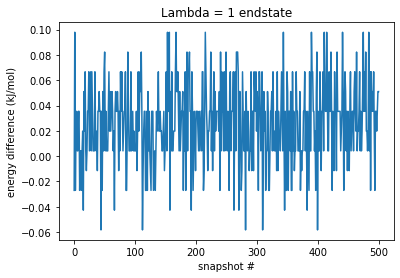

In [12]:
plt.plot(np.array(energies_og) - np.array(energies_hybrid))
plt.ylabel("energy difference (kJ/mol)")
plt.xlabel("snapshot #")
plt.title("Lambda = 1 endstate")
plt.show()


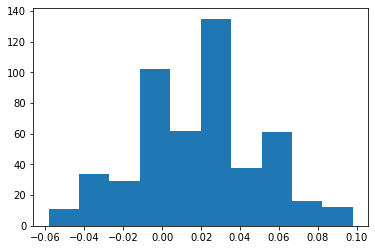

In [13]:
plt.hist(np.array(energies_og) - np.array(energies_hybrid))
plt.show()

In [14]:
np.mean(np.array(energies_og) - np.array(energies_hybrid))

0.026056217590812593

In [15]:
np.std(np.array(energies_og) - np.array(energies_hybrid))

0.03194533874198286

In [17]:
for i, (energy_og, energy_hybrid) in enumerate(zip(energies_og, energies_hybrid)):
    if energy_og - energy_hybrid > 0.15:
        print(i, energy_og - energy_hybrid, energy_og, energy_hybrid)

29 0.3010890390141867 173170.74352562684 173170.44243658782
35 0.8714015390141867 45329.493525626836 45328.62212408782
37 0.44171403907239437 625035.7435256268 625035.3018115878
102 0.5667140390141867 -136530.06897437316 -136530.63568841218
109 10.19171404093504 21055796.993525628 21055786.801811587
110 55.691714039072394 5225960.993525627 5225905.301811588
129 0.2854640390141867 -153762.75647437316 -153763.04193841218
181 0.4417140390141867 -155451.63147437316 -155452.07318841218
190 0.2229640390141867 -162859.38147437316 -162859.60443841218
196 0.2854640390141867 -146267.69397437316 -146267.97943841218
197 0.1760890390141867 -171919.50647437316 -171919.68256341218
232 1.3167140390141867 345342.61852562684 345341.3018115878
240 1.4182765390141867 -122467.00647437316 -122468.42475091218
247 0.2542140390141867 375057.24352562684 375056.9893115878
257 0.8635890390141867 -128242.88147437316 -128243.74506341218
267 0.5198390390141867 -147021.06897437316 -147021.58881341218
271 0.3792140390

In [16]:
with open("energies_bnbs_hybrid_lambda_1.pickle", "wb") as f:
    pickle.dump(energies_hybrid, f)
with open("energies_bnbs_og_lambda_1.pickle", "wb") as f:
    pickle.dump(energies_og, f)